<a href="https://colab.research.google.com/github/anirudh14397/US-babynames-analysis/blob/main/US_baby_names_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **US baby Names 1880-2010**

In [ ]:
import pandas as pd 
names1880 = pd.read_csv('/content/drive/MyDrive/Datasets/babynames/yob1880.txt',names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [ ]:
#sum of births by sex as the total number of births in that year
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [ ]:
years = range(1880,2011)
pieces=[]
columns=['name','sex','births']

for year in years:
  path='/content/drive/MyDrive/Datasets/babynames/yob%d.txt' %year
  frame=pd.read_csv(path,names=columns)
  frame['year']=year
  pieces.append(frame)
#concatenate everything into single dataframe
names=pd.concat(pieces,ignore_index=True)

In [ ]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [ ]:
total_births=names.pivot_table('births',index='year',columns='sex',aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


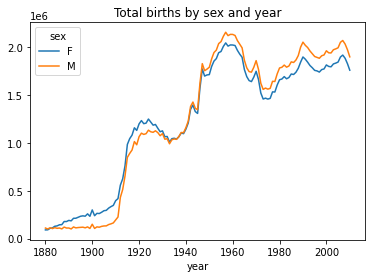

In [ ]:
#total births by sex and year
total_births.plot(title='Total births by sex and year')

In [ ]:
def add_prop(group):
  #integer division floors
  births=group.births.astype(float)
  group['prop']=births/births.sum()
  return group
names = names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [ ]:
#to chck that the group sum are sufficiently close to 1
import numpy as np
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [ ]:
#top 1000 names for each sex/year combination
def get_top1000(group):
  return group.sort_values(by='births',ascending=False)[:1000]
grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)

In [ ]:
pieces=[]
for year,group in names.groupby(['year','sex']):
  pieces.append(group.sort_values(by='births',ascending=False)[:1000])
top1000 =pd.concat(pieces,ignore_index=True)

In [ ]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


**analyzing naming trends**

In [ ]:
boys=top1000[top1000['sex']=='M']
girls=top1000[top1000['sex']=='F']

In [ ]:
total_births = pd.pivot_table(data=top1000,values='births',index='year',columns='name',aggfunc='sum')
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
subset=total_births[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45ae86a2d0>,
      dtype=object)

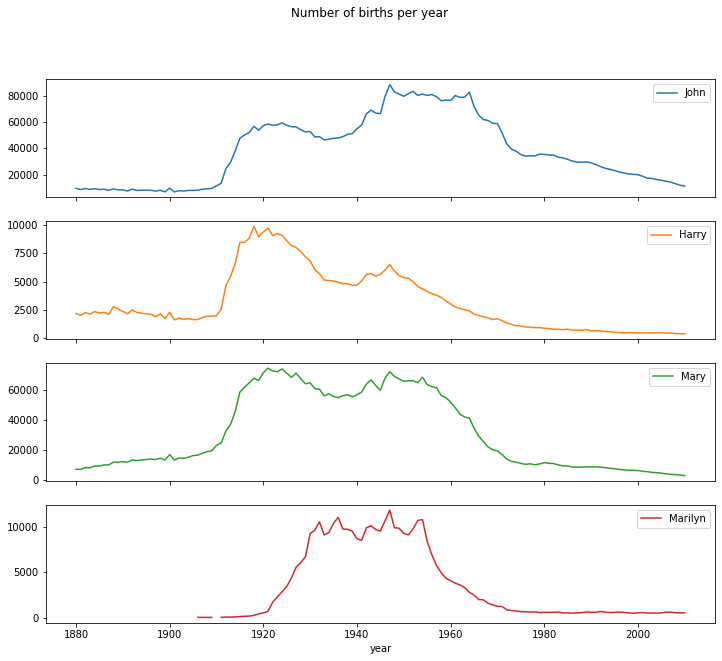

In [ ]:
#a few boy and girl names over time
subset.plot(subplots=True,figsize=(12,10),grid=False,title="Number of births per year")

**measuring the increase in naming diversity**

In [ ]:
table=top1000.pivot_table('prop',index='year',columns='sex',aggfunc='sum')

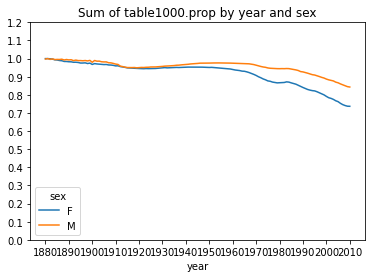

In [ ]:
#proportion of births represented in top 1000 by sex
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [ ]:
df=boys[boys['year']==2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [ ]:
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [ ]:
prop_cumsum.searchsorted(0.5)

116

In [ ]:
df=boys[boys['year']==1900]

In [ ]:
in1900 = df.sort_values(by='prop',ascending=False).prop.cumsum()

In [ ]:
in1900.searchsorted(0.5)+1

25

In [ ]:
def get_quantile_count(group,q=0.5):
  group=group.sort_values(by='prop',ascending=False)
  return group.prop.cumsum().searchsorted(q)+1

diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


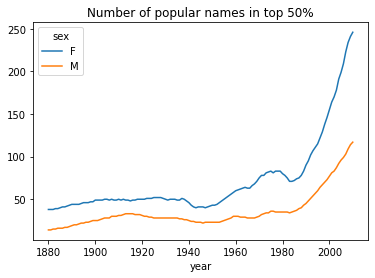

In [ ]:
#Plotof diversity metric by year
diversity.plot(title="Number of popular names in top 50%")

In [ ]:
#extract last letter from name column
get_last_letter=lambda x:x[-1]
last_letters =names.name.map(get_last_letter)
last_letters.name='last_letter'

table=names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc='sum')

In [ ]:
subtable=table.reindex(columns=[1910,1960,2010],level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [ ]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [ ]:
letter_prop=subtable/subtable.sum().astype(float)

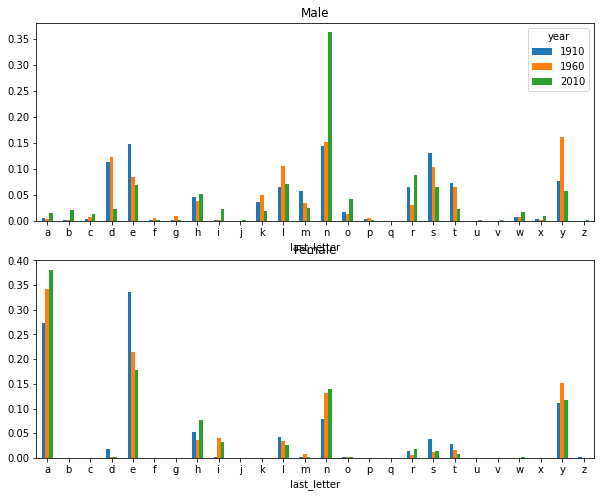

In [ ]:
#proportion of boy and girl names ending in each letter
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)

In [ ]:
letter_prop=table/table.sum().astype(float)

In [ ]:
dny_ts=letter_prop.loc[['d','n','y'],'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


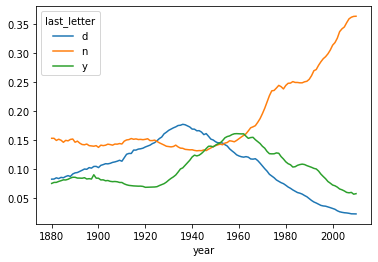

In [ ]:
#Proportion of boys born with names ending in d/n/y over time
dny_ts.plot()

**boy names that becaome girl names and vice versa**

In [ ]:
all_names= top1000['name'].unique()

In [ ]:
mask=np.array(['lesl' in x.lower() for x in all_names])

In [ ]:
lesley_like=all_names[mask]

In [ ]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [ ]:
filtered=top1000[top1000['name'].isin(lesley_like)]

In [ ]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [ ]:
table=filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum')

In [ ]:
table=table.div(table.sum(1),axis=0)

In [ ]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


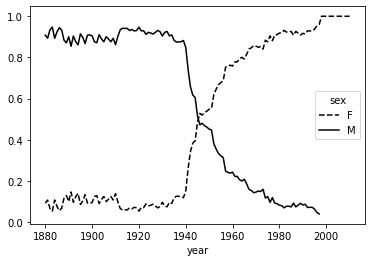

In [ ]:
#Proportion of male/Female Lesley like names over time
table.plot(style={'M':'k-','F':'k--'})